# ---------------------------- **TWITTER SENTIMENT ANALYSIS** ------------------------

### Importing libraries  ###

In [791]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import re
from sklearn.metrics import *
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

### Reading the twitter dataset ###

In [570]:
df = pd.read_csv('train.csv')
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


### Checking for null values ###

In [572]:
df.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

### Checking the shape of the dataset ###

In [574]:
df.shape

(27481, 4)

### Dropping out null values in the dataset ###

In [576]:
df.dropna(inplace = True)

### Dropping the unwanted columns ###

In [578]:
df.drop(columns = ['textID', 'selected_text'], inplace = True)

### Unique values in the dataset ###

In [580]:
df.nunique()

text         27480
sentiment        3
dtype: int64

### Counting the sentiments in the dataset ###

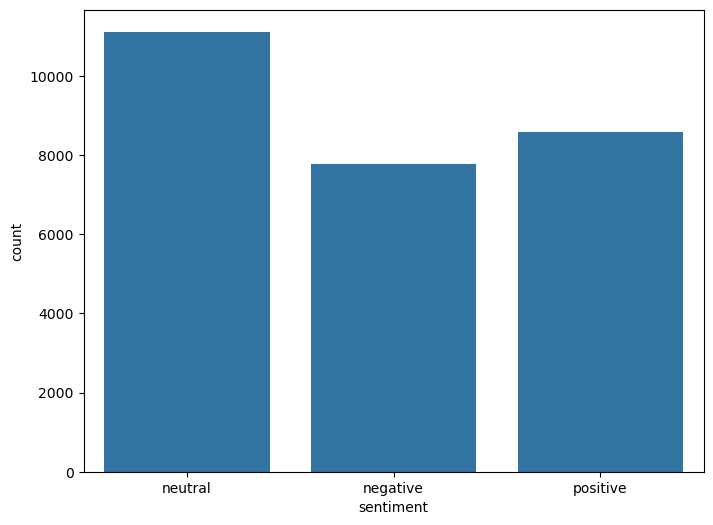

In [582]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'sentiment', data = df)
plt.show()

### Counting length of the text in the dataset ###

In [584]:
df['text_length'] = df['text'].apply(lambda x : len(x))

In [585]:
df.head()

,text,sentiment,text_length
0,"I`d have responded, if I were going",neutral,36
1,Sooo SAD I will miss you here in San Diego!!!,negative,46
2,my boss is bullying me...,negative,25
3,what interview! leave me alone,negative,31
4,"Sons of ****, why couldn`t they put them on t...",negative,75


### Counting length of the words in the dataset ###

In [587]:
df['text_words'] = df['text'].apply(lambda x : len(x.split()))

In [588]:
df.head()

,text,sentiment,text_length,text_words
0,"I`d have responded, if I were going",neutral,36,7
1,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,my boss is bullying me...,negative,25,5
3,what interview! leave me alone,negative,31,5
4,"Sons of ****, why couldn`t they put them on t...",negative,75,14


### Expanding the regular short expression of text column ###

In [590]:
def expand(phrase):
    # specific
    phrase = re.sub(r"won`t", "will not", phrase)
    phrase = re.sub(r"can\`t", "can not", phrase)

    # general
    phrase = re.sub(r"n\`t", " not", phrase)
    phrase = re.sub(r"\`re", " are", phrase)
    phrase = re.sub(r"\`s", " is", phrase)
    phrase = re.sub(r"\`d", " would", phrase)
    phrase = re.sub(r"\`ll", " will", phrase)
    phrase = re.sub(r"\`t", " not", phrase)
    phrase = re.sub(r"\`ve", " have", phrase)
    phrase = re.sub(r"\`m", " am", phrase)
    return phrase

In [591]:
df['text'] = df['text'].apply(expand)

### Removing speacial characters & numbers from the text ###

In [593]:
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

### Converting whole text into lower case for better understanding of the model ###

In [595]:
df['text'] = df['text'].str.lower()

In [596]:
df.head()

,text,sentiment,text_length,text_words
0,i would have responded if i were going,neutral,36,7
1,sooo sad i will miss you here in san diego,negative,46,10
2,my boss is bullying me,negative,25,5
3,what interview leave me alone,negative,31,5
4,sons of why could not they put them on the r...,negative,75,14


### Removing stopwords in english from text column & showing key words ###

stop_words = stopwords.words('english')

In [599]:
#function to remove stopwords and tokenize
stop_words = stopwords.words('english')
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return (text)

In [600]:
df['clean_text']= df['text'].apply(lambda x: remove_stopwords(x))

In [601]:
df.head()

,text,sentiment,text_length,text_words,clean_text
0,i would have responded if i were going,neutral,36,7,"[would, responded, going]"
1,sooo sad i will miss you here in san diego,negative,46,10,"[sooo, sad, miss, san, diego]"
2,my boss is bullying me,negative,25,5,"[boss, bullying]"
3,what interview leave me alone,negative,31,5,"[interview, leave, alone]"
4,sons of why could not they put them on the r...,negative,75,14,"[sons, could, put, releases, already, bought]"


### Stemming the text to their original form in English ###

In [603]:
stemmer_words = PorterStemmer()

In [604]:
def text_stemming(text):
    text = [stemmer_words.stem(word) for word in text]
    return (' '.join(text))

In [605]:
df['stemmed_words'] = df['clean_text'].apply(lambda x : text_stemming(x))

In [606]:
df.head()

,text,sentiment,text_length,text_words,clean_text,stemmed_words
0,i would have responded if i were going,neutral,36,7,"[would, responded, going]",would respond go
1,sooo sad i will miss you here in san diego,negative,46,10,"[sooo, sad, miss, san, diego]",sooo sad miss san diego
2,my boss is bullying me,negative,25,5,"[boss, bullying]",boss bulli
3,what interview leave me alone,negative,31,5,"[interview, leave, alone]",interview leav alon
4,sons of why could not they put them on the r...,negative,75,14,"[sons, could, put, releases, already, bought]",son could put releas alreadi bought


### Sentiment Counts & visualize ###

In [608]:
sentiment_count = df['sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,neutral,11117
1,positive,8582
2,negative,7781


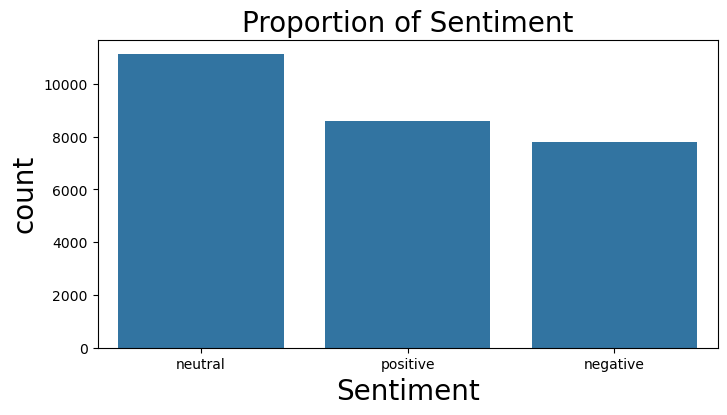

In [609]:
plt.figure(figsize = (8,4))
sns.barplot(x = "Sentiment", y = 'count', data = sentiment_count)
plt.title("Proportion of Sentiment", fontsize = 20)
plt.xlabel("Sentiment", fontsize = 20)
plt.ylabel('count', fontsize = 20)
plt.show()

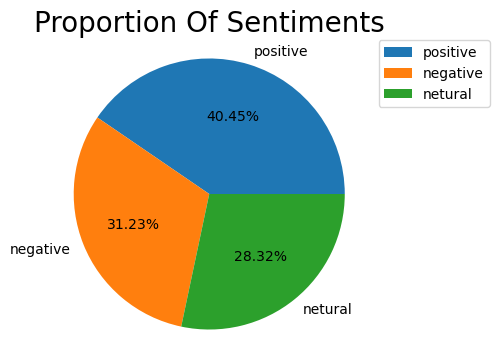

In [610]:
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['sentiment'].value_counts().to_list()
labels = ['positive','negative','netural']
plt.figure(figsize = (6,4))
plt.pie(x = sentiment_count1, labels = labels, autopct = "%.2f%%", radius = 1.1)
plt.title("Proportion Of Sentiments", fontsize = 20)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0)
plt.show()

### Extracting all unique sentiments ### 

In [612]:
positive_sentiment_df = df[df['sentiment'] == 'positive']
negative_sentiment_df = df[df['sentiment'] == 'negative']
neutral_sentiment_df = df[df['sentiment'] == 'neutral']

In [736]:
print(positive_sentiment_df.shape)

(8582, 6)


In [738]:
print(negative_sentiment_df.shape)

(7781, 6)


In [740]:
print(neutral_sentiment_df.shape)

(11117, 6)


### Listing all positive texts in dataset ###

In [743]:
positive_text_combined = []
for i in range(len(positive_sentiment_df)):
    positive_text_combined.append(positive_sentiment_df['text'].iloc[i])

In [745]:
positive_text_combined[:5]

['2am feedings for the baby are fun when he is all smiles and coos',
 ' journey wow u just became cooler  hehe is that possible',
 'i really really like the song love story by taylor swift',
 'playing ghost online is really interesting the new updates are kirin pet and metamorph for third job  ca not wait to have a dragon pet',
 'the free fillin app on my ipod is fun im addicted']

### Visualizing positive words using WORDCLOUD ###

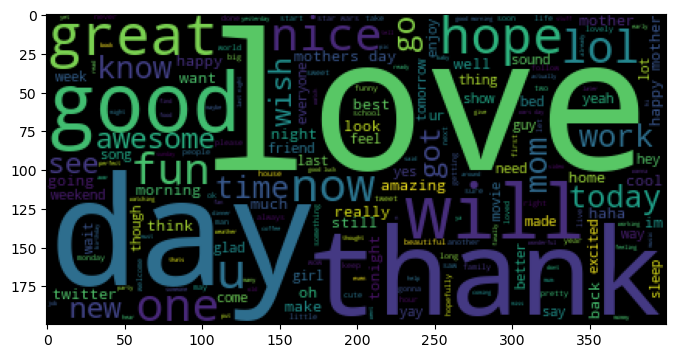

In [748]:
wordcloud_img_pos = WordCloud(stopwords = STOPWORDS)
wordcloud_img_pos.generate(''.join(positive_text_combined))
plt.figure(figsize = (8,6))
plt.imshow(wordcloud_img_pos)
plt.show()

### Listing all negative texts in dataset ###

In [751]:
negative_text_combined = []
for i in range(len(negative_sentiment_df)):
    negative_text_combined.append(negative_sentiment_df['text'].iloc[i])

In [753]:
negative_text_combined[:5]

[' sooo sad i will miss you here in san diego',
 'my boss is bullying me',
 ' what interview leave me alone',
 ' sons of  why could not they put them on the releases we already bought',
 'my sharpie is running dangerously low on ink']

### Visualizing negative words using WORDCLOUD ###

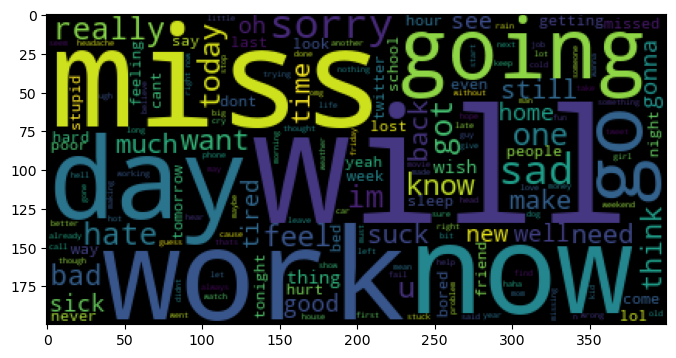

In [756]:
wordcloud_img_neg = WordCloud(stopwords = STOPWORDS)
wordcloud_img_neg.generate(''.join(negative_text_combined))
plt.figure(figsize = (8,6))
plt.imshow(wordcloud_img_neg)
plt.show()

### Listing all negative texts in dataset ###

In [759]:
neutral_text_combined = []
for i in range(len(neutral_sentiment_df)):
    neutral_text_combined.append(neutral_sentiment_df['text'].iloc[i])

In [761]:
neutral_text_combined[:5]

[' i would have responded if i were going',
 'httpwwwdothebouncycomsmf  some shameless plugging for the best rangers forum on earth',
 'soooo high',
 ' both of you',
 ' as much as i love to be hopeful i reckon the chances are minimal p i am never gonna get my cake and stuff']

### Visualizing neutral words using WORDCLOUD ###

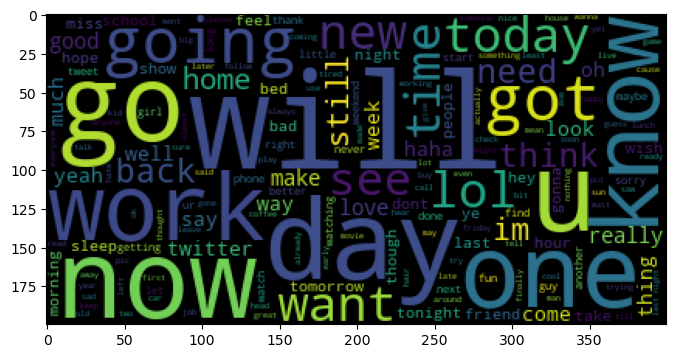

In [764]:
wordcloud_img_neut = WordCloud(stopwords = STOPWORDS)
wordcloud_img_neut.generate(''.join(neutral_text_combined))
plt.figure(figsize = (8,6))
plt.imshow(wordcloud_img_neut)
plt.show()

### Exploring different models using train test split ###

In [631]:
x = df['clean_text']
y = df['sentiment']

In [632]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 42)

# Using CountVectorizer to Extracting Features from Text #

### CountVectorizer is a great tool used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis). ###

In [634]:
# Bag of words
cv_model = CountVectorizer(binary = False, max_df = 1.0, min_df = 5, ngram_range = (1,2))
cv_x_train = cv_model.fit_transform(x_train.astype(str).str.strip())

In [635]:
cv_x_train.shape

(20610, 4627)

# Understanding TF-IDF (Term Frequency-Inverse Document Frequency) #

### TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used in natural language processing and information retrieval to evaluate the importance of a word in a document relative to a collection of documents (corpus). Unlike simple word frequency, TF-IDF balances common and rare words to highlight the most meaningful terms. ###

In [636]:
# TF-IDF
tv_model = TfidfVectorizer(use_idf = True, max_df = 1.0, min_df = 5, ngram_range = (1,2), sublinear_tf = True)
tv_x_train = tv_model.fit_transform(x_train.astype(str).str.strip())

In [637]:
cv_x_train.shape

(20610, 4627)

In [638]:
cv_x_test = cv_model.transform(x_test.astype(str).str.strip())
tv_x_test = tv_model.transform(x_test.astype(str).str.strip())

# Applying different Machine Learning Algorithms #

## Using Machine learning models with Count Vectorizer feature selection ##

### GridSearchCV for Optimizing Logistic Regression Performance ###

In [639]:
#Initalizing the model
lr_cv_model = LogisticRegression()
parameters = dict(penalty = ['l1', 'l2'], C = [100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
logreg_Gcv_model = GridSearchCV(lr_cv_model, parameters, cv = 15)

#fitting the data to model
logreg_Gcv_model.fit(cv_x_train,y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [640]:
#predicted values
y_pred_lr_cv_model = logreg_Gcv_model.predict(cv_x_test)

In [641]:
y_pred_lr_cv_model

array(['neutral', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [642]:
#Accuracy
accuracy_log_reg_gcv_cv = accuracy_score(y_test,y_pred_lr_cv_model)
print("Accuracy Score :",(accuracy_score(y_test,y_pred_lr_cv_model)))

Accuracy Score : 0.6771470160116448


In [643]:
# Classification report of Performance metrics
print(classification_report(y_test,y_pred_lr_cv_model))

              precision    recall  f1-score   support

    negative       0.74      0.55      0.63      1945
     neutral       0.61      0.78      0.68      2779
    positive       0.77      0.66      0.71      2146

    accuracy                           0.68      6870
   macro avg       0.70      0.66      0.67      6870
weighted avg       0.69      0.68      0.68      6870



### Decision Tree Model ###

In [644]:
# Initializing model
dt_cv_model = DecisionTreeClassifier()

#fitting the data to model
dt_cv_model.fit(cv_x_train, y_train)

#predicted values
y_pred_dt_cv = dt_cv_model.predict(cv_x_test)

In [645]:
# Accuracy
accuracy_dt_cv = np.mean(cross_val_score(dt_cv_model, cv_x_train, y_train, cv = 5))
print("Accuracy: {}" .format(accuracy_dt_cv))

Accuracy: 0.6337700145560408


In [646]:
# Classification report of Performance metrics
print(classification_report(y_test, y_pred_dt_cv))

              precision    recall  f1-score   support

    negative       0.58      0.63      0.61      1945
     neutral       0.63      0.58      0.60      2779
    positive       0.68      0.70      0.69      2146

    accuracy                           0.63      6870
   macro avg       0.63      0.64      0.63      6870
weighted avg       0.63      0.63      0.63      6870



### K-Nearest Neighbors Classifier Model ###

In [647]:
# Initializing model
knn = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}
knn_cv_model = GridSearchCV(estimator = knn, param_grid = param)

#fitting the data to model
knn_cv_model.fit(cv_x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [648]:
#predicted values
y_pred_knn_cv = knn_cv_model.predict(cv_x_test)

In [649]:
# Accuracy
accuracy_knn_cv = accuracy_score(y_test, y_pred_knn_cv)
print("Accuracy :",(accuracy_score(y_test, y_pred_knn_cv)))

Accuracy : 0.5649199417758369


In [650]:
# Classification report of Performance metrics
print(classification_report(y_test, y_pred_knn_cv))

              precision    recall  f1-score   support

    negative       0.67      0.30      0.41      1945
     neutral       0.50      0.85      0.63      2779
    positive       0.75      0.44      0.56      2146

    accuracy                           0.56      6870
   macro avg       0.64      0.53      0.53      6870
weighted avg       0.63      0.56      0.54      6870



### Support Vector Machine Model ###

In [651]:
# Initializing model
svm_cv_model = SVC()

#fitting the data to model
svm_cv_model.fit(cv_x_train, y_train)

#prediction
y_pred_svm_cv = svm_cv_model.predict(cv_x_test)

In [652]:
# Accuracy
accuracy_svm_cv = accuracy_score(y_test, y_pred_svm_cv)
print("Accuracy :",(accuracy_score(y_test, y_pred_svm_cv)))

Accuracy : 0.6870451237263464


In [653]:
# Classification report of Performance metrics
print(classification_report(y_test, y_pred_svm_cv))

              precision    recall  f1-score   support

    negative       0.76      0.54      0.63      1945
     neutral       0.61      0.79      0.69      2779
    positive       0.77      0.69      0.73      2146

    accuracy                           0.69      6870
   macro avg       0.72      0.67      0.68      6870
weighted avg       0.71      0.69      0.69      6870



## Using Machine learning models with Td-IDF Vector feature selection ##

### GridSearchCV for Optimizing Logistic Regression Performance ###

In [654]:
# Initializing model
lr_tv_model = LogisticRegression()
parameters = dict(penalty = ['l1', 'l2'], C = [100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
lr_tv_Gcv = GridSearchCV(lr_tv_model, parameters, cv = 5)

#fitting the data to model
lr_tv_Gcv.fit(tv_x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [655]:
#predicted values
y_pred_lr_tv_Gcv = lr_tv_Gcv.predict(tv_x_test)

In [656]:
#Accuracy
accuracy_log_reg_gcv_tv = accuracy_score(y_test, y_pred_lr_tv_Gcv)
print("Accuracy :",(accuracy_log_reg_gcv))

Accuracy : 0.6799126637554586


In [657]:
# Classification report of Performance metrics
print(classification_report(y_test, y_pred_lr_tv_Gcv))

              precision    recall  f1-score   support

    negative       0.70      0.60      0.65      1945
     neutral       0.62      0.74      0.67      2779
    positive       0.77      0.68      0.72      2146

    accuracy                           0.68      6870
   macro avg       0.70      0.67      0.68      6870
weighted avg       0.69      0.68      0.68      6870



## Decision Tree Classifer Model ##

In [658]:
# Initializing model
dt_tv_model = DecisionTreeClassifier()

#fitting the data to model
dt_tv_model.fit(tv_x_train, y_train)

#prediction
y_pred_dt_tv = dt_tv_model.predict(tv_x_test)

In [659]:
# Accuracy
accuracy_dt_tv = np.mean(cross_val_score(dt_tv_model, tv_x_train, y_train, cv = 5))
print("Accuracy: {}" .format(np.mean(cross_val_score(dt_tv_model, tv_x_train, y_train, cv = 5))))

Accuracy: 0.6411935953420669


In [660]:
# Classification report of Performance metrics
print(classification_report(y_test, y_pred_dt_tv))

              precision    recall  f1-score   support

    negative       0.60      0.62      0.61      1945
     neutral       0.63      0.61      0.62      2779
    positive       0.70      0.71      0.71      2146

    accuracy                           0.64      6870
   macro avg       0.64      0.65      0.65      6870
weighted avg       0.64      0.64      0.64      6870



## K-Nearest Neighbors Classifer Model ##

In [661]:
# Initializing model
knn = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}
knn_tv_model = GridSearchCV(estimator = knn, param_grid = param)

#fitting the data to model
knn_tv_model.fit(tv_x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [662]:
#predicted values
y_pred_knn_tv = knn_cv_model.predict(tv_x_test)

In [663]:
# Accuracy
accuracy_knn_tv = accuracy_score(y_test, y_pred_knn_tv)
print("Accuracy :",(accuracy_score(y_test, y_pred_knn_tv)))

Accuracy : 0.4344978165938865


In [664]:
# Classification report of Performance metrics
print(classification_report(y_test, y_pred_knn_tv))

              precision    recall  f1-score   support

    negative       0.57      0.07      0.13      1945
     neutral       0.42      0.97      0.58      2779
    positive       0.80      0.07      0.14      2146

    accuracy                           0.43      6870
   macro avg       0.59      0.37      0.28      6870
weighted avg       0.58      0.43      0.32      6870



## Support Vector Machine Classifer Model ##

In [665]:
# Initializing model
svm_tv_model = SVC()

#fitting the data to model
svm_tv_model.fit(tv_x_train, y_train)

#prediction
y_pred_svm_tv = svm_tv_model.predict(tv_x_test)

In [666]:
# Accuracy
accuracy_svm_tv = accuracy_score(y_test, y_pred_svm_tv)
print("Accuracy :",(accuracy_score(y_test, y_pred_svm_tv)))

Accuracy : 0.6855895196506551


In [667]:
# Classification report of Performance metrics
print(classification_report(y_test, y_pred_svm_tv))

              precision    recall  f1-score   support

    negative       0.76      0.56      0.64      1945
     neutral       0.61      0.79      0.69      2779
    positive       0.79      0.66      0.72      2146

    accuracy                           0.69      6870
   macro avg       0.72      0.67      0.68      6870
weighted avg       0.70      0.69      0.68      6870



# Comparing Different ML models used with CV & Td-Idf feature selection #

In [668]:
# Model's acurracy Score Comparision

acurracy = {'Model':  ['Logistic Regression with GridserachCV', 'Decision Tree Classifier','K-Nearest-Neighbours Classifier','Support-Vector-Machine Classifier'],
        'Count Vector':  [accuracy_log_reg_gcv_cv, accuracy_dt_cv, accuracy_knn_cv, accuracy_svm_cv],
        'Tf/idf Vector': [accuracy_log_reg_gcv_tv, accuracy_dt_tv, accuracy_knn_tv, accuracy_svm_tv]}

cv_score_table= pd.DataFrame (acurracy, columns = ['Model','Count Vector','Tf/idf Vector'])

cv_score_table

,Model,Count Vector,Tf/idf Vector
0,Logistic Regression with GridserachCV,0.677147,0.679913
1,Decision Tree Classifier,0.633770,0.638768
2,K-Nearest-Neighbours Classifier,0.564920,0.434498
3,Support-Vector-Machine Classifier,0.687045,0.685590


## Observation : ##

### 1: As per observation SVM model is best suited for this dataset. ###